In [3]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
import math
sys.path.append('../')

from packages import actv_analysis, svm, stats

In [ ]:
# Store the cosine similarity results for each epoch in a dictionary
cs_dict = {}
relu=4
min_epoch=0
max_epoch=90
min_net=1
max_net=10

# Specify the file path to save the cs_dict dictionary
file_path = f'Representation_similarity_matrix_dict_relu{relu}_nets{min_net} to {max_net} epoch{min_epoch} to {max_epoch} 4to20.pkl'
print(file_path)

for epoch in range(min_epoch, max_epoch+1, 10):
    cs_dict[epoch] = stats.cos_similarity(relu=relu, epoch=epoch, nets=range(min_net, max_net+1), min_num_idx=1)


# Open the file in binary mode and save the dictionary using pickle
with open(file_path, 'wb') as file:
    pickle.dump(cs_dict, file)

In [ ]:
relu=4
min_epoch=0
max_epoch=90
min_net=1
max_net=10

# Specify the file path to save the cs_dict dictionary
file_path = f'Representation_similarity_matrix_dict_relu{relu}_nets{min_net} to {max_net} epoch{min_epoch} to {max_epoch} 4to20.pkl'

# Open the file in binary mode and load the dictionary using pickle
with open(file_path, 'rb') as file:
    cs_dict = pickle.load(file)



# Determine the global x and y limits
global_x_min = float('inf')
global_x_max = float('-inf')
global_y_min = float('inf')
global_y_max = float('-inf')

from sklearn.manifold import MDS

for epoch, cs in cs_dict.items():
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    mds_results = mds.fit_transform(1 - cs)

    global_x_min = min(global_x_min, mds_results[:, 0].min())
    global_x_max = max(global_x_max, mds_results[:, 0].max())
    global_y_min = min(global_y_min, mds_results[:, 1].min())
    global_y_max = max(global_y_max, mds_results[:, 1].max())

print("Global x_min: ", global_x_min)
print("Global x_max: ", global_x_max)
print("Global y_min: ", global_y_min)
print("Global y_max: ", global_y_max)

# Plot the MDS for each epoch using the stored cosine similarity results
for epoch, cs in cs_dict.items():
    stats.plot_mds(cs, relu=4, epoch=epoch, x_lim=(-0.5, round(global_x_max,1)), y_lim=(round(global_y_min,1), 0.4))

In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise distances and convert to square form
dist_matrix = squareform(pdist(mds_results))

# Initialize lists to hold the data
num1_list, sz1_list, num2_list, sz2_list, pdist_list = [], [], [], [], []

# Define function to convert index to num and sz
def index_to_num_sz(index):
    num = 2 * (index // 7) + 2
    sz = index % 7 + 3
    return num, sz

# Iterate over pairs of points (upper triangular matrix indices)
for i in range(dist_matrix.shape[0]):
    for j in range(i+1, dist_matrix.shape[1]):
        # Convert indices to num and sz
        num1, sz1 = index_to_num_sz(i)
        num2, sz2 = index_to_num_sz(j)
        
        # Store the num, sz, and distance values in the lists
        num1_list.append(num1)
        sz1_list.append(sz1)
        num2_list.append(num2)
        sz2_list.append(sz2)
        pdist_list.append(dist_matrix[i, j])

# Create the DataFrame
df_pdist = pd.DataFrame({
    'num1': num1_list,
    'sz1': sz1_list,
    'num2': num2_list,
    'sz2': sz2_list,
    'pdist': pdist_list
})

In [ ]:
df_pdist.to_csv('pdist.csv')

## PCA of number representation

In [ ]:
net=1; relu=5; epoch=0
actv_net = actv_analysis.get_actv_net(net=net, relu=relu, epoch=epoch)

In [ ]:
avg_actv_net = np.mean(actv_net, axis=2)

In [ ]:
avg_actv_net_nxs = avg_actv_net.reshape(43264,10,10)[:,:,3:]

In [ ]:
from sklearn.decomposition import PCA

# Assuming avg_actv_net_nxs[:,5,:] is a 2D numpy array
data = avg_actv_net_nxs[:,5,:]

# Initialize PCA
pca = PCA()

# Fit the PCA to your data
pca.fit(data)

# Transform the data to the first two principal components
transformed_data = pca.transform(data)

# Print the explained variance ratios
print("Explained Variance Ratios:", pca.explained_variance_ratio_)


In [ ]:
import matplotlib.pyplot as plt

# Separate the two dimensions into x and y for easier plotting
x = transformed_data[:, 0]
y = transformed_data[:, 1]

# Create a new figure
plt.figure()

# Create a scatter plot of the two principal components
plt.scatter(x, y)

# Add annotations
for i, txt in enumerate(some_list_of_labels):
    plt.annotate(txt, (x[i], y[i]))

# Add labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a title
plt.title('PCA of avg_actv_net_nxs[:,5,:]')

# Show the plot
plt.show()


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(actv_net[:,37,:].T)

In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise distances and convert to square form
dist_matrix = squareform(pdist(mds_results))

# Initialize lists to hold the data
index1_list, index2_list, pdist_list = [], [], []

# Iterate over pairs of points (upper triangular matrix indices)
for i in range(dist_matrix.shape[0]):
    for j in range(i+1, dist_matrix.shape[1]):
        # Store the indices and the distance in the lists
        index1_list.append(i)
        index2_list.append(j)
        pdist_list.append(dist_matrix[i, j])

# Create the DataFrame
df_pdist = pd.DataFrame({
    'index1': index1_list,
    'index2': index2_list,
    'pdist': pdist_list
})

In [ ]:
cs_dict

In [ ]:
import seaborn as sns
net=1; relu=4; epoch=0
sns.set_theme(style="dark", color_codes=True)

pkl_filename = f'pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
if os.path.exists(pkl_filename):
    try:
        with open(pkl_filename, 'rb') as f:
            units = pickle.load(f)
    except Exception as e:
        print(f"Pickle file {pkl_filename} failed to load due to error: {e}")
        
nspearmanr = [units[i].spearmanr_number for i in range(len(units))]
sspearmanr = [units[i].spearmanr_size for i in range(len(units))]

sns.histplot(nspearmanr)

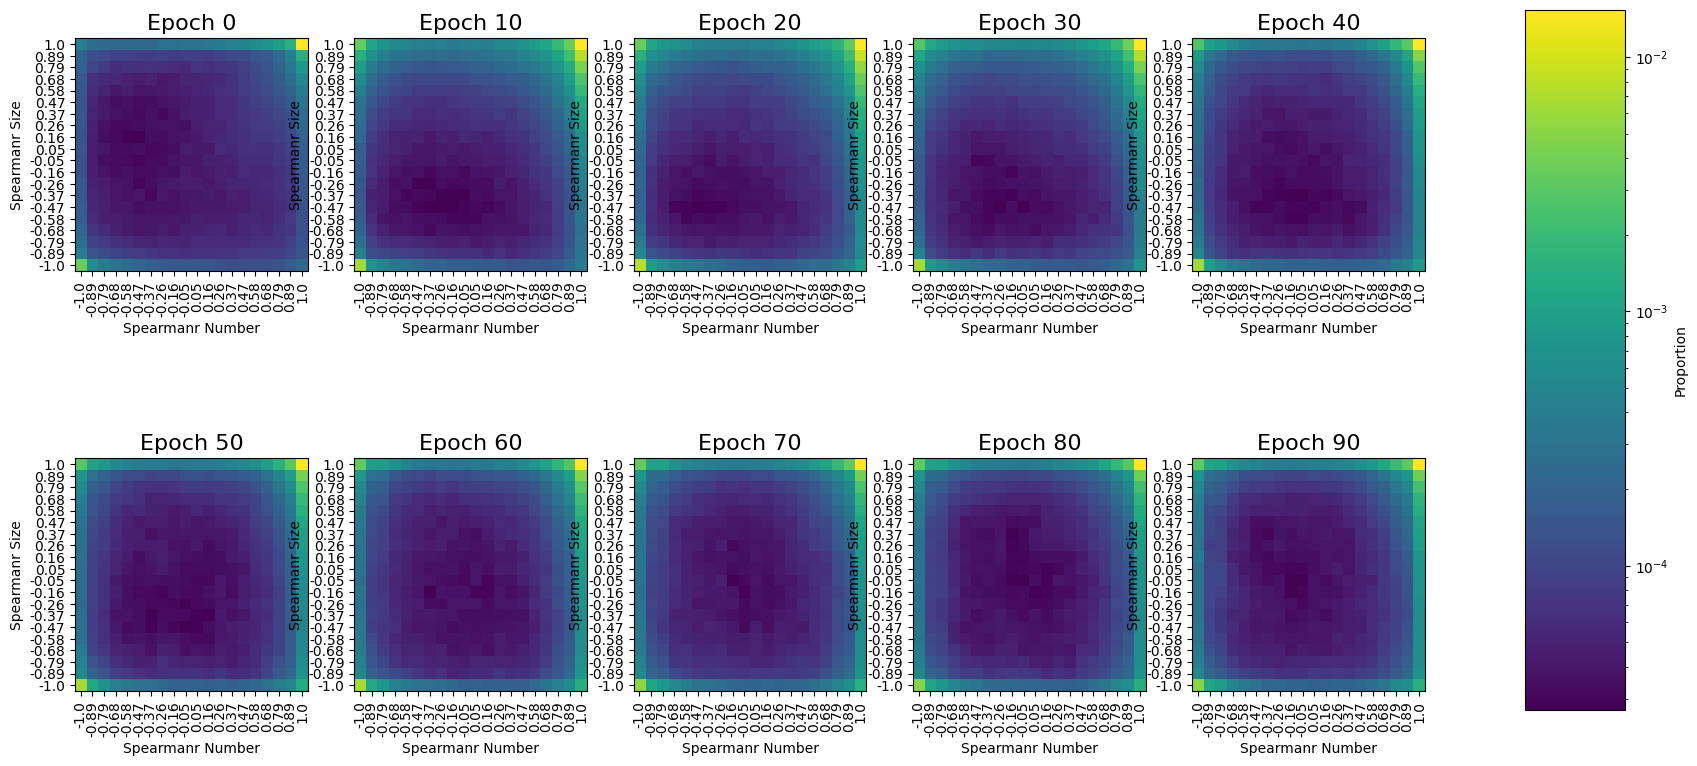

In [34]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# List of networks, relus, and epochs to plot
networks = list(range(1, 11))  # [1, 2, ..., 10]
relu=4
epochs = list(range(0, 91, 10))  # [0, 10, 20, ..., 90]

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for ax, epoch in zip(axs.flatten(), epochs):
    # Initialize an empty array to store the sum of histograms
    hist_sum = np.zeros((20, 20))

    for net in networks:
        # Load data from file
        pkl_filename = f'pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
        if os.path.exists(pkl_filename):
            try:
                with open(pkl_filename, 'rb') as f:
                    units = pickle.load(f)
            except Exception as e:
                print(f"Pickle file {pkl_filename} failed to load due to error: {e}")

        # Extract spearmanr values and pair them together
        paired_values = [(u.spearmanr_number, u.spearmanr_size) for u in units if not (np.isnan(u.spearmanr_number) or np.isnan(u.spearmanr_size))]

        # Unpack the cleaned, paired values back into separate lists
        nspearmanr, sspearmanr = zip(*paired_values)

        # Create 2D histogram
        hist, xedges, yedges = np.histogram2d(nspearmanr, sspearmanr, bins=20)

        # Add histogram to the sum
        hist_sum += hist

    # Normalize histogram to create a proportion of the total
    hist_avg = hist_sum / (np.sum(hist_sum) * len(networks))

    # Plot histogram as heatmap
    im = ax.imshow(hist_avg, cmap='viridis', origin='lower', norm=LogNorm())

    # Set axis labels and plot title
    ax.set_xlabel('Spearmanr Number')
    ax.set_ylabel('Spearmanr Size')
    ax.set_title(f'Epoch {epoch}', fontsize=16)

    # Set the ticks
    xticks = [round(x, 2) for x in np.linspace(min(nspearmanr), max(nspearmanr), hist_avg.shape[1])]
    yticks = [round(y, 2) for y in np.linspace(min(sspearmanr), max(sspearmanr), hist_avg.shape[0])]

    ax.set_xticks(np.arange(hist_avg.shape[1]))
    ax.set_xticklabels(xticks, rotation=90)
    ax.set_yticks(np.arange(hist_avg.shape[0]))
    ax.set_yticklabels(yticks)

# Add a colorbar to the figure
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Proportion')
plt.savefig(f'Proportion of SpearmanR on number and size in Relu{relu}.pdf')

# Show the plot
plt.show()

In [ ]:
units[0].spearmanr_number